In [1]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train_set/"

/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hastings/anaconda3/envs/styl

In [2]:
names = os.listdir(data_dir)


FileNotFoundError: [Errno 2] No such file or directory: 'prepped_data/train_set/'

In [3]:
classes.shape

NameError: name 'classes' is not defined

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.001))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
__________

In [6]:
"""name = names[0]

def load_dataset(name):
    with open(name, "rb") as f:
        dataset = pickle.load(f)

    data = []
    classes = []
    for elem in dataset:
        data_entry = np.array(np.stack(elem["data"], axis=-1), dtype=np.float32)
        data_entry += 1000
        data_entry /= 2000
        data.append(data_entry)

        class_entry = elem["classes"]
        class_entry = np.concatenate([class_entry[0] / 9, class_entry[1].flatten()])
        classes.append(class_entry)
    data = np.array(data)
    classes = np.array(classes)
    return data, classes
"""

NameError: name 'names' is not defined

In [78]:
for _ in range(20):
    print("===========")
    for name in names:
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=200,
              epochs=5,
              verbose=1,
              validation_data=(tdata, tclasses))

Train on 2048 samples, validate on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 35s 17ms/sample - loss: 0.1012 - val_loss: 0.1132
Epoch 2/5
2048/2048 [==============================] - 44s 22ms/sample - loss: 0.0882 - val_loss: 0.0980
Epoch 3/5
2048/2048 [==============================] - 47s 23ms/sample - loss: 0.0692 - val_loss: 0.1008
Epoch 4/5
2048/2048 [==============================] - 40s 19ms/sample - loss: 0.0605 - val_loss: 0.1004
Epoch 5/5
2048/2048 [==============================] - 36s 17ms/sample - loss: 0.0516 - val_loss: 0.1036
Train on 2048 samples, validate on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 40s 19ms/sample - loss: 0.1448 - val_loss: 0.1110
Epoch 2/5
2048/2048 [==============================] - 40s 20ms/sample - loss: 0.1242 - val_loss: 0.0996
Epoch 3/5
2048/2048 [==============================] - 40s 20ms/sample - loss: 0.1055 - val_loss: 0.1029
Epoch 4/5
2048/2048 [==============================] - 40s 19ms/

2048/2048 [==============================] - 45s 22ms/sample - loss: 0.0641 - val_loss: 0.1034
Epoch 3/5
2048/2048 [==============================] - 44s 21ms/sample - loss: 0.0525 - val_loss: 0.1005
Epoch 4/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0462 - val_loss: 0.0968
Epoch 5/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0398 - val_loss: 0.0983
Train on 2048 samples, validate on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 42s 20ms/sample - loss: 0.0789 - val_loss: 0.1036
Epoch 2/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0604 - val_loss: 0.1006
Epoch 3/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0506 - val_loss: 0.1023
Epoch 4/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0442 - val_loss: 0.1005
Epoch 5/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.0395 - val_loss: 0.0998
Train on 2048 sam

KeyboardInterrupt: 

In [60]:
tdata, tclasses = load_dataset("prepped_data/test_set/Pancreas_6pregenerated.pickle")

In [79]:
rclasses = model.predict(tdata)

In [80]:
rclasses[0]

array([ 1.2342985 , -0.72146106, -0.22430232,  0.97486824,  0.00282698,
       -0.00460165, -0.00237219,  0.97655785, -0.00298579,  0.00541406,
        0.00315424,  0.9623571 ], dtype=float32)

In [81]:
tclasses[0]

array([ 0.69142932, -1.63635466,  0.20688781,  0.99922277, -0.0304131 ,
       -0.02507803,  0.03017072,  0.99949486, -0.0099874 ,  0.02536911,
        0.00922301,  0.99963561])

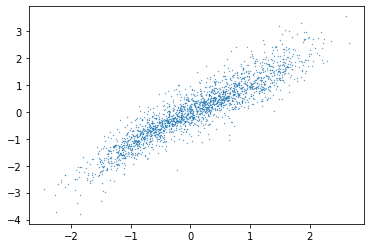

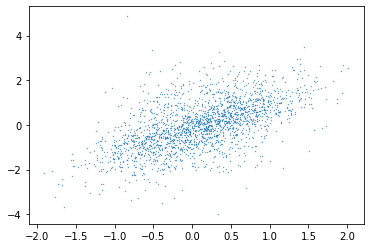

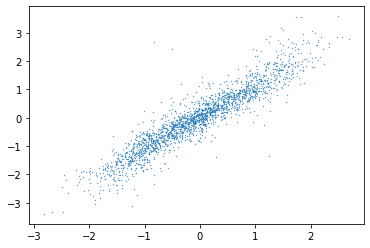

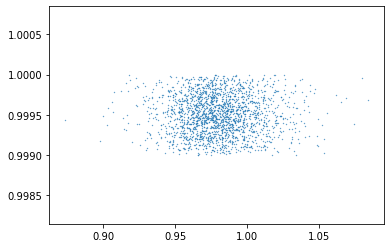

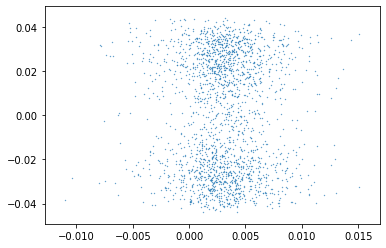

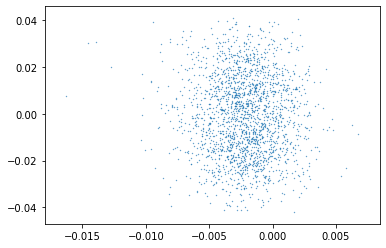

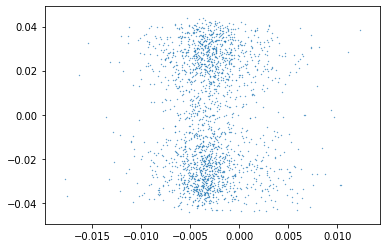

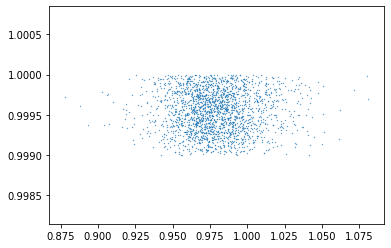

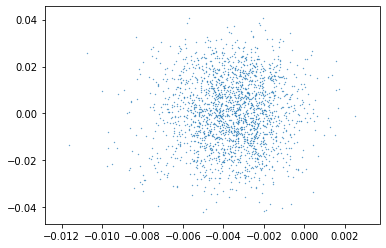

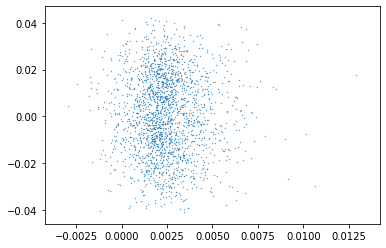

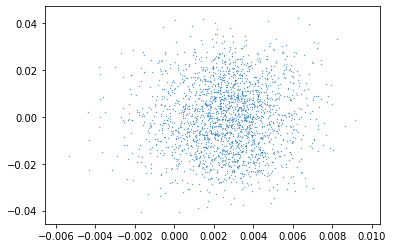

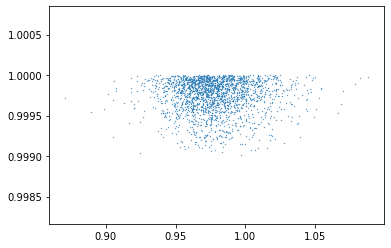

In [84]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:, j], s=.1)
    plt.show()